2021-10-20

* Supervisor: Dominique PASTOR
* Student: Kevin MICHALEWICZ

<h1><center> Practical on SVMs </h1></center>
<center> by Paul AIME, paul.aime@imt-atlantique.fr </center>

In this practical we will first scrutinize an elementary example of SVM and then see some SVM applications under Python. The packages used are `scikit-learn` (and its subpackages `svm` et `datasets`), `numpy`, `pandas` and `matplotlib`.

**Table of contents**

* [1. An elementary SVM](#1.-An-elementary-SVM)
* [2. Iris](#2.-Iris)
* [3. Chronic Kidney Disease](#3.-Chronic-Kidney-Disease)
    + [3.1 Data preparation](#3.1-Data-preparation)
    + [3.2 Data preparation for cross validation](#3.2-Data-preparation-for-cross-validation)
    + [3.3 Cross-validation and results](#3.3-Cross-validation-and-results)
* [4. SPAM](#4.-SPAM)

In [1]:
from platform import python_version

print(python_version())

3.9.7


## 1. An elementary SVM

In the Euclidean plane $R^2$ take individuals $(1, 1), (1, 5), (5, 1)$ and $(5, 5)$, assigned to classes $−1$, $1$, $1$, $1$

Manually calculate the vector $(a, b)$ and the value of $c$ of the maximal margin classifier straight line.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import svm

mpl.style.use("ggplot")

In [3]:
X = np.array([[1, 1], [1, 5], [5, 1], [5, 5]])
y = np.array([-1, 1, 1, 1])

👁 [`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

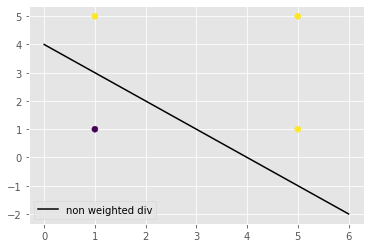

In [4]:
clf = svm.SVC(kernel="linear")
clf.fit(X, y)

w = clf.coef_[0]
a = -w[0] / w[1]

xx = np.linspace(0, 6)
yy = a * xx - clf.intercept_[0] / w[1]

fig, ax = plt.subplots()
ax.plot(xx, yy, "k-", label="non weighted div")
ax.scatter(X[:, 0], X[:, 1], c=y)
ax.legend()

What is the meaning of the obtained results :

In [5]:
print("clf.support_vectors_ = ")
print(clf.support_vectors_)
print(f"{clf.n_support_ = !s}")
print(f"{             w = !s}")

clf.support_vectors_ = 
[[1. 1.]
 [1. 5.]
 [5. 1.]]
clf.n_support_ = [1 2]
             w = [0.49975586 0.49975586]


**Comments on the results:** the three rows on the *clf.support_vectors_* matrix refer to each of the support vectors. The vector *clf.n_support_* specifies how many support vectors each class possess. Finally, $w$ corresponds to the vector $(a,b)$ that will be introduced in the next code cell. 

The dividing line $D$ can be obtained by satisfying the following conditions:

$\begin{cases}
    \lVert (a,b) \rVert \text{ must be minimal}\\
    f(z_i)\big(\langle\,(a,b), z_i\rangle + c\big) \geq 1, \forall i
    \end{cases}$

We choose three support vectors:

- $z_1=(1,1)$ - Class $-1$

- $z_2=(1,5)$ - Class $+1$

- $z_3=(5,1)$ - Class $+1$

and we notice that the distance to the dividing line is $\sqrt2$ in every case. We would like that

$\langle\,(a,b), z_1\rangle + c = -1$

$\langle\,(a,b), z_2\rangle + c = 1$

$\langle\,(a,b), z_3\rangle + c = 1$
 
The system is solved below.

In [6]:
svecs = np.array([[1, 1, 1], [1, 5, 1], [5, 1, 1]])
labels = np.array([-1, 1, 1])

params = np.linalg.inv(svecs).dot(labels)
print("(a,b) = ({},{}) and c = {}".format(params[0].round(3), params[1].round(3), params[2].round(3)))

(a,b) = (0.5,0.5) and c = -2.0


## 2. Iris

We will start with the famous data set “Iris” : the size in centimeters of petals and other parts of some
flowers. For every individual we have four number and the class, among *Iris setosa*, *Iris versicolor* and *Iris
virginica*. We have 150 individuals and equidistributed classes.

In [7]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
import random

In [8]:
# Load data
iris = datasets.load_iris()

# Extract arrays
X, y = iris.data, iris.target

# Extract some useful information
num_classes = len(iris.target_names)
classes_labels = sorted(set(iris.target))

# Initialize classfier
clf = svm.SVC()

Cut of the iris data to create a training set `X_train`, `y_train` with 100 random individuals and a test set `X_test`, `y_test` with what remains.


👁 [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [9]:
train_size = 100
sample_position = [i for i in range(150)]
random.shuffle(sample_position)

train_X = X[sample_position[:train_size]]
train_y = y[sample_position[:train_size]]
test_X = X[sample_position[train_size:]]
test_y = y[sample_position[train_size:]]

Calculate the precision and recall for each class.

In [10]:
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)

In [11]:
def precision_recall_multilabels(y_true, y_pred, labels):
    recalls = []
    precisions = []
    for cl in range(len(labels)):
        precisions.append(sum([y_pred[i]==cl for i in range(y_true.shape[0]) if y_true[i]==cl])/sum([y_pred[i]==cl for i in range(y_true.shape[0])]))
        recalls.append(sum([y_pred[i]==cl for i in range(y_true.shape[0]) if y_true[i]==cl])/sum([y_true[i]==cl for i in range(y_true.shape[0])]))
    return precisions, recalls


precisions, recalls = precision_recall_multilabels(test_y, y_pred, classes_labels)

print(f"{precisions = }")
print(f"{   recalls = }")

precisions = [1.0, 0.9375, 0.875]
   recalls = [1.0, 0.8823529411764706, 0.9333333333333333]


Check result against `sklearn.metrics.classification_report`

In [12]:
from sklearn.metrics import classification_report

print(classification_report(test_y, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        18
           1     0.9375    0.8824    0.9091        17
           2     0.8750    0.9333    0.9032        15

    accuracy                         0.9400        50
   macro avg     0.9375    0.9386    0.9374        50
weighted avg     0.9413    0.9400    0.9401        50



By using the class `KFold` from the package `sklearn.cross_validation`, write the code for a 10-crossed validation
and obtain average precision and recall for each class.

Use various kernel types and parameter values to see how the performances vary.

You have the choice between four kernels (option `kernel` of SVC) :

1. linear: `linear` $k(x, x') = \langle x, x' \rangle$ ;
2. polynomial: `poly` $k(x, x') = (\gamma \cdot \langle x, x' \rangle + r)^d$ ;
3. radial: `rbf` $k(x, x') = e^{-\gamma \lVert x - x' \rVert}$ (default) ;
4. sigmoid: `sigmoid` $k(x, x') = \mathrm{tanh}(\gamma \cdot \langle x, x' \rangle)$.

Parameters $\gamma$, $d$ and $r$ are written `gamma`, `degree` and `coef0`, resp. The cost parameter $C$ (see in the
class) is written `cost`.

👁 [`sklearn.model_selection.KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

In [13]:
from sklearn.model_selection import KFold

In [14]:
# Once you have filled the `clfs_results` dictionnary below
# call `kfold_multimodels_report(clfs_results)`


def kfold_multimodels_report(clfs_results: dict[str, dict[str, list[list[float]]]]):
    """
    Prints a report for the results of experiments on multiple models,
    each one evaluated using k-fold cross-validation.

    The results of the experiments should be given as the 'clfs_stats'
    argument, with the following structure:

    {
        "clf_name1": {"metric1": list[list], "metric2": list[list], ...},
        "clf_name2": {"metric1": list[list], "metric2": list[list], ...},
        ...
    }

    with each list[list] being of shape (num_folds, num_classes).
    """
    clfs_stats = kfold_summarize_results(clfs_results)
    with np.printoptions(precision=2, floatmode="fixed"):
        for clf_name, clf_stats in clfs_stats.items():
            print(f"{clf_name:<15}")
            for metric_name, stats in clf_stats.items():
                print(f"{metric_name:>15}")
                for stat_name, data in stats.items():
                    print(f"{stat_name:>20}: {data}")


def kfold_summarize_results(clfs_results):
    """Computes stats on results of multi-models k-folds experiments.

    Takes:

    {
        "clf_name1": {"metric1": list[list], "metric2": list[list], ...},
        "clf_name2": {"metric1": list[list], "metric2": list[list], ...},
        ...
    }

    Returns:

    {
        "clf_name1": {"metric1": {"mean": value, "std": value ...}, ...},
        ...
    }
    """
    clfs_stats = {clf_name: {} for clf_name in clfs_results}
    for clf_name, clf_results in clfs_results.items():
        for metric, data in clf_results.items():
            clfs_stats[clf_name][metric] = {
                "mean": np.mean(data, axis=0),
                "std": np.std(data, axis=0),
            }
    return clfs_stats

In [15]:
def kfold_precisions_recalls(X, y, labels, clf, kf: KFold):
    """Returns the history of precisions and recalls through K-fold training

    Parameters
    ----------
    X, y : data
    labels : list[int]
    clf : classifier
    kf : KFold instance

    Returns
    -------
    precisions : list[list], shape (num_folds, len(labels))
    recalls : list[list], shape (num_folds, len(labels))
    """
    precisions, recalls = [], []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        precisions.append(precision_recall_multilabels(y_test, y_pred, labels)[0])
        recalls.append(precision_recall_multilabels(y_test, y_pred, labels)[1])
        
    return precisions, recalls


In [16]:
X, y = iris.data, iris.target
num_classes = len(iris.target_names)
classes_labels = sorted(set(iris.target))


clfs = {
    "linear": svm.SVC(kernel="linear", C=1.0),
    "poly2": svm.SVC(kernel="poly", degree=2),
    "poly3": svm.SVC(kernel="poly", degree=3),
    "poly4": svm.SVC(kernel="poly", degree=4),
    "rbf": svm.SVC(kernel="rbf")
}

clfs_results = {clf_name: {"precisions": None, "recalls": None} for clf_name in clfs}

In [17]:
kf = KFold(n_splits=10, shuffle=True)

for clf_name, clf in clfs.items():
    
    
    clfs_results[clf_name]["precisions"] = (kfold_precisions_recalls(X, y, classes_labels, clf, kf))[0]
    clfs_results[clf_name]["recalls"] = (kfold_precisions_recalls(X, y, classes_labels, clf, kf))[1]

kfold_multimodels_report(clfs_results)

linear         
     precisions
                mean: [1.00 1.00 0.96]
                 std: [0.00 0.00 0.07]
        recalls
                mean: [1.00 0.95 1.00]
                 std: [0.00 0.11 0.00]
poly2          
     precisions
                mean: [1.00 0.98 0.95]
                 std: [0.00 0.06 0.10]
        recalls
                mean: [1.00 0.96 0.99]
                 std: [0.00 0.10 0.04]
poly3          
     precisions
                mean: [1.00 0.99 0.92]
                 std: [0.00 0.03 0.15]
        recalls
                mean: [1.00 0.91 0.97]
                 std: [0.00 0.11 0.07]
poly4          
     precisions
                mean: [1.00 0.93 0.92]
                 std: [0.00 0.16 0.13]
        recalls
                mean: [1.00 0.97 0.98]
                 std: [0.00 0.07 0.07]
rbf            
     precisions
                mean: [1.00 0.93 0.93]
                 std: [0.00 0.08 0.10]
        recalls
                mean: [1.00 0.90 0.93]
                 st

## 3. Chronic Kidney Disease

We clean the data and we replace missing values by the column's average. We save the prepared data in the file "data.dat", with the input format required by SVM light.

In [18]:
import os, re
f = open("chronic_kidney_disease_full.arff")
file2write = open("data.dat","w")

attribute = dict()
type = dict()
attributes = []
reading_data = 0
results = []
somme = [0] * 25
howmany = [0] * 25
for line in f:
    if (re.match(r'''^@attribute[ ]+'([a-z]+)'[ ]+numeric''',line)):
        m = re.match(r'''^@attribute[ ]+'([a-z]+)'[ ]+numeric''',line)
        name=m.group(1)
        attributes.append(name)
        attribute[name] = dict()
        type[name]='numeric'
    elif (re.match(r'''^@attribute '([a-z]+)' {(.+)}''',line)):
        m=re.match(r'''^@attribute '([a-z]+)' {(.+)}''',line)
        name=m.group(1)
        attributes.append(name)
        values=re.split(',',m.group(2))
        attribute[name] = dict()
        type[name]='modal'
        i=-1
        for x in values:
            i += 1
            attribute[name][x]=i
    elif (reading_data==1):
        vals=re.split(',',line.rstrip())
        if (len(vals)==25):
            results.append(vals)
    elif (re.match(r'''^@data''',line)):
        reading_data=1
for vals in results:
    for i in range(25):
        if (vals[i]!='?'):
            if (type[attributes[i]]=='modal'):
                somme[i] += attribute[attributes[i]][vals[i]]
            else:
                somme[i] += float(vals[i])
            howmany[i] += 1
newresults = []

for vals in results:
    newvals = [0] * 25
    for i in range(25):
        if (vals[i] == '?'):
            if (howmany[i] > 0):
                newvals[i]=float(somme[i]/howmany[i])
            else:
                newvals[i]=0.0
        elif (type[attributes[i]]=='modal'):
            newvals[i]=float(attribute[attributes[i]][vals[i]])
        else:
            newvals[i]=float(vals[i])
    newresults.append(newvals)
    if (newvals[24]==0):
        result="1"
    else:
        result="-1"
    for i in range(24):
        result += " "+str(i+1)+":"+str(newvals[i])
    result+='\r\n'

    file2write.write(result)

file2write.close()

We generate ten train and test files (each containing a 10 percent of the total data), which will be used by SVM light.

In [19]:
import random, os
f=open("data.dat","r",newline='\r\n')
data=[]
for line in f:
    data.append(line)
    random.shuffle(data)
    dixieme=int(len(data)/10)+1
    for I in range(10):
        train_file = open("train"+str(I)+".dat","w")
        test_file = open("test"+str(I)+".dat","w")
        for J in range(0,I * dixieme):
            if (J < len(data)):
                train_file.write(data[J])
        for J in range(I * dixieme,(I+1) * dixieme):
            if (J < len(data)):
                test_file.write(data[J])
        for J in range((I+1) * dixieme,len(data)):
            if (J < len(data)):
                train_file.write(data[J])
    train_file.close()
    test_file.close()

We execute the SVM and we calculate the average runtime, error, precision and recall.

In [21]:
import subprocess, os, re
from subprocess import PIPE
runtime = 0.0
error = 0.0
precision = 0.0
recall = 0.0
for I in range(10):
    p = subprocess.run(['/Users/kevinmicha/Documents/IMT Atlantique/UE A - Intro ML/svm_learn','-z', 'c', '-c', '1.0', '-t', '1', '-d', '2', 'train'+str(I)+'.dat', 'model'], stdout=subprocess.PIPE)
    for line in re.split(r'\n',p.stdout.decode()):
        if (re.match(r'Runtime in cpu-seconds: ([0-9.]+)',line)):
            m=re.match(r'Runtime in cpu-seconds: ([0-9.]+)',line)
            runtime += float(m.group(1))
        if (re.match(r'XiAlpha-estimate of the error: error<=([0-9.]+)',line)):
            m=re.match(r'XiAlpha-estimate of the error: error<=([0-9.]+)',line)
            error += float(m.group(1))
        if (re.match(r'XiAlpha-estimate of the recall: recall=>([0-9.]+)',line)):
            m=re.match(r'XiAlpha-estimate of the recall: recall=>([0-9.]+)',line)
            recall += float(m.group(1))
        if (re.match(r'XiAlpha-estimate of the precision: precision=>([0-9.]+)',line)):
            m=re.match(r'XiAlpha-estimate of the precision: precision=>([0-9.]+)',line)
            precision += float(m.group(1))
    print(str(I)+"...")
print("runtime = "+str(runtime/10)+" cpu seconds")
print("error = "+str(error/10)+"%")
print("precision = "+str(precision/10)+"%")
print("recall = "+str(recall/10)+"%")

OSError: [Errno 86] Bad CPU type in executable: '/Users/kevinmicha/Documents/IMT Atlantique/UE A - Intro ML/svm_learn'